In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# KMeans
from sklearn.cluster import KMeans

In [2]:
df = pd.read_pickle('../data/pickled_listings_df')

In [3]:
num_only_df = df[['price', 'weekly_price', 'monthly_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                'minimum_nights', 'maximum_nights', 'review_scores_rating', 
                'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms', 
                'calculated_host_listings_count_shared_rooms', 'host_loc_denver', 'is_superhost', 'needs_license', 
                'in_top_10_neighbourhood', 'room_type_Entire home/apt', 'room_type_Private room',
                'room_type_Shared room', 'current_license', 'list_loc_denver']]

In [4]:
few_categorical_df = df[['price', 'minimum_nights', 'maximum_nights','review_scores_rating','host_loc_denver', 
                        'needs_license','room_type_Entire home/apt', 'room_type_Private room',
                        'room_type_Shared room', 'current_license', 'list_loc_denver']]

In [6]:
y_target_vals = df.loc[:,['is_violating']].values

## Plot PCA, n_components = 5, plot first 2, all num_cat's

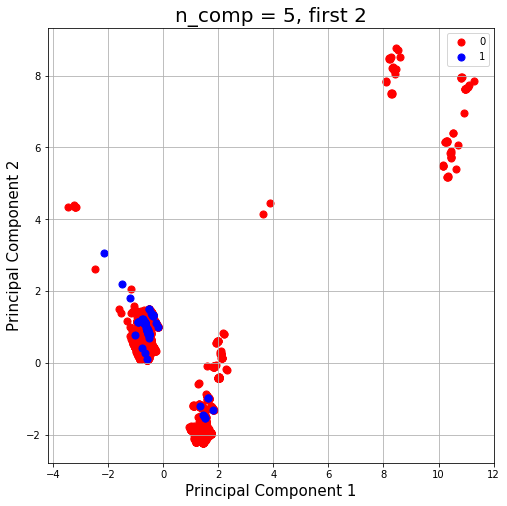

In [28]:
features = ['price', 'weekly_price', 'monthly_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
'maximum_nights', 'review_scores_rating', 'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_loc_denver',
'is_superhost', 'needs_license', 'in_top_10_neighbourhood', 'room_type_Entire home/apt', 'room_type_Private room',
'room_type_Shared room', 'current_license', 'list_loc_denver']

# Separating out the features
x = num_only_df.loc[:, features].values

# Separating out the target
y = df.loc[:,['is_violating']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=5)

num_only_principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3', 'principal component 4',
                          'principal component 5'])

num_only_pcaDf = pd.concat([principalDf, df[['is_violating']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('n_comp = 5, first 2', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pcaDf['is_violating'] == target
    ax.scatter(pcaDf.loc[indicesToKeep, 'principal component 1']
               , pcaDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

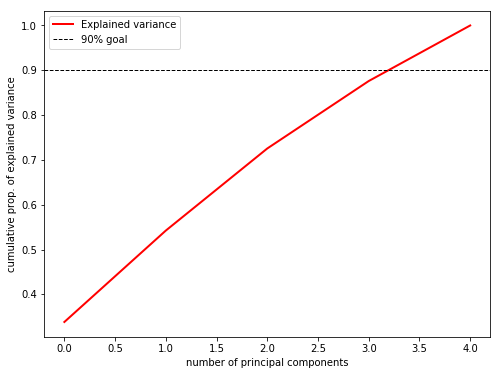

In [14]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(prop_var_expl, color='red', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
ax.set_ylabel('cumulative prop. of explained variance')
ax.set_xlabel('number of principal components')
ax.legend();

In [22]:
print(f'PCA explained variance is {pca.explained_variance_}')
print(f'\nPCA explained variance ratio is {pca.explained_variance_ratio_}')

PCA explained variance is [2.21237596 1.92993254 1.23290343 1.06439845 1.00537038]

PCA explained variance ratio is [0.2010805  0.17540952 0.11205728 0.09674204 0.09137705]


## KMeans
#### Plot PCA, n_components = 5, plot first 2, all num_cat's

In [ ]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(data[0])

kmeans.cluster_centers_

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Plot PCA, n_components = 5, plot first 2, all num_cat's

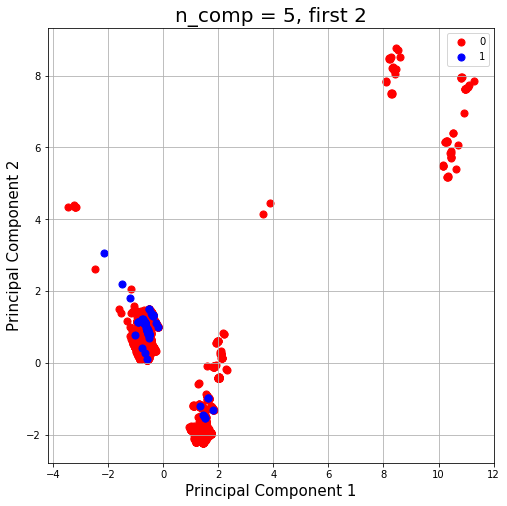

In [29]:
features = ['price', 'minimum_nights', 'maximum_nights','review_scores_rating',
            'host_loc_denver', 'needs_license','room_type_Entire home/apt', 
            'room_type_Private room','room_type_Shared room', 'current_license', 
            'list_loc_denver']

# Separating out the features
x = few_categorical_df.loc[:, features].values

# Separating out the target
y = df.loc[:,['is_violating']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=5)

few_principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3', 'principal component 4',
                          'principal component 5'])

few_pcaDf = pd.concat([principalDf, df[['is_violating']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('n_comp = 5, first 2', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pcaDf['is_violating'] == target
    ax.scatter(pcaDf.loc[indicesToKeep, 'principal component 1']
               , pcaDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

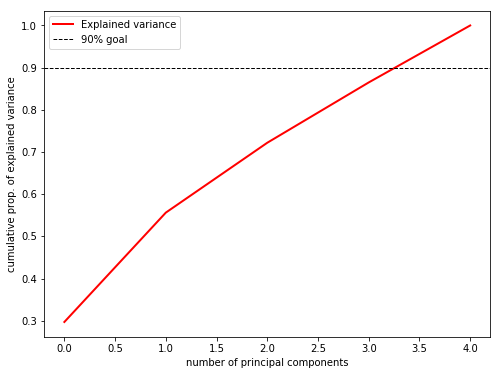

In [26]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(prop_var_expl, color='red', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
ax.set_ylabel('cumulative prop. of explained variance')
ax.set_xlabel('number of principal components')
ax.legend();

In [27]:
print(f'PCA explained variance is {pca.explained_variance_}')
print(f'\nPCA explained variance ratio is {pca.explained_variance_ratio_}')

PCA explained variance is [2.21237596 1.92993254 1.23290343 1.06439845 1.00537038]

PCA explained variance ratio is [0.2010805  0.17540952 0.11205728 0.09674204 0.09137705]
